In [1]:
from PIL import Image

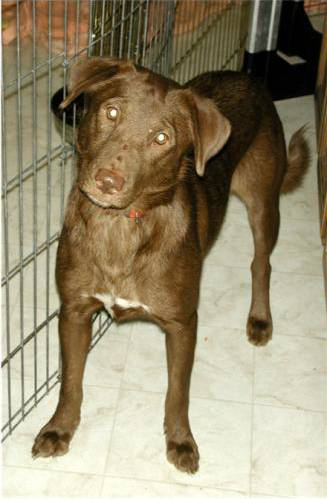

In [2]:
Image.open("/home/admin1/Downloads/machine_learning/week15/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/training_set/dogs/dog.1.jpg")

In [5]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import os
import cv2
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')

In [6]:
train_cats = '/home/admin1/Downloads/machine_learning/week15/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/training_set/cats'
train_dogs = '/home/admin1/Downloads/machine_learning/week15/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/training_set/dogs'

test_cats = '/home/admin1/Downloads/machine_learning/week15/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/test_set/cats'
test_dogs = '/home/admin1/Downloads/machine_learning/week15/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/test_set/dogs'

In [7]:
print('Number of images of Cats in training dataset are-', len(os.listdir(train_cats)))
print('Number of images of Dogs in training dataset are-', len(os.listdir(train_dogs)))
print('Number of images of Cats in test dataset are-', len(os.listdir(test_cats)))
print('Number of images of Cats in ttest dataset are-', len(os.listdir(test_dogs)))

Number of images of Cats in training dataset are- 4001
Number of images of Dogs in training dataset are- 4001
Number of images of Cats in test dataset are- 1001
Number of images of Cats in ttest dataset are- 1001


# Initialising the CNN

In [8]:
classifier = Sequential()

# Convolutional Layer

In [9]:
classifier.add(Convolution2D(filters = 32, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

filters = 32 filters

no of rows of the filter = 3

no of columns of filter = 3

64 = no of columns of input image

64 = no of rows of input image

3 = no of channels

# Pooling

In [10]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

2,2 = filter of size 2x2

# Flattening

In [11]:
classifier.add(Flatten())

# Fully Connected Layer

In [12]:
classifier.add(Dense(units = 128, activation = 'relu'))

# Output Layer

In [13]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling The CNN

In [14]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


# Fitting the CNN to the Images

# Image Augmentaion

In [16]:
from keras.preprocessing.image import ImageDataGenerator

# Train Dataset

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [18]:
training_set = train_datagen.flow_from_directory(directory ='/home/admin1/Downloads/machine_learning/week15/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/training_set',
                                                target_size = (64,64),
                                                batch_size = 250,
                                                class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [19]:
len(training_set)

32

The shape of the target size should be same as the input_shape(shape of the input image) whoich is 64x64

# Test Dataset

In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
test_set = test_datagen.flow_from_directory(directory = '/home/admin1/Downloads/machine_learning/week15/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/test_set',
                                           target_size = (64, 64),
                                           batch_size = 250,
                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [22]:
len(test_set)

8

# Fitting the model

In [23]:
predictions = classifier.fit_generator(training_set,
                                       samples_per_epoch = 8000,
                                       nb_epoch = 10,
                                       validation_data = test_set,
                                       validation_steps = 2000)


Epoch 1/10
32/32 [==============================] - 1197s 37s/step - loss: 0.7948 - acc: 0.5511 - val_loss: 0.6350 - val_acc: 0.6325
Epoch 2/10
32/32 [==============================] - 1430s 45s/step - loss: 0.6378 - acc: 0.6295 - val_loss: 0.6160 - val_acc: 0.6580
Epoch 3/10
32/32 [==============================] - 1127s 35s/step - loss: 0.5997 - acc: 0.6746 - val_loss: 0.5929 - val_acc: 0.6755
Epoch 4/10
32/32 [==============================] - 1301s 41s/step - loss: 0.5794 - acc: 0.6878 - val_loss: 0.5660 - val_acc: 0.7120
Epoch 5/10
32/32 [==============================] - 1153s 36s/step - loss: 0.5608 - acc: 0.7109 - val_loss: 0.5768 - val_acc: 0.6945
Epoch 6/10
32/32 [==============================] - 1019s 32s/step - loss: 0.5811 - acc: 0.6919 - val_loss: 0.5726 - val_acc: 0.7010
Epoch 7/10
32/32 [==============================] - 1019s 32s/step - loss: 0.5390 - acc: 0.7341 - val_loss: 0.5483 - val_acc: 0.7300
Epoch 8/10
32/32 [==============================] - 1020s 32s/step -

steps_per_epoch = 32

training_set values = 8000

batch_size = 250

so steps_per_epoch = 8000 / 250 = 32

so len(training_set) = 32

In [24]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

From this we can make out that keras has assigned 0 label for cats and 1 label for dog

In [25]:
from scipy.misc.pilutil import imread
from scipy.misc.pilutil import imresize

In [109]:
img_path = '/home/admin1/Downloads/machine_learning/week15/Convolutional-Neural-Networks/Convolutional_Neural_Networks/dataset/test_set/cats/cat.4064.jpg'
image = imread(img_path)

In [110]:
image.shape

(500, 494, 3)

In [111]:
image = imresize(image, (64, 64))

In [112]:
image.shape

(64, 64, 3)

In [113]:
image = image.astype('float32')

In [114]:
image = np.reshape(image, (1, 64,64,3))

In [115]:
image.shape

(1, 64, 64, 3)

In [116]:
predict = classifier.predict_classes(image)

In [117]:
predict

array([[0]], dtype=int32)

In [118]:
if predict:
    print('The given image is of a Dog')
else:
    print('The given image is of a Cat')

The given image is of a Cat
